### CA 1
Submitted by : Pang Daowei

### Kaggle Titanic Machine Learning from Disaster

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### This Notebook will do the following:

#### Data Handling:
* data importing
* data exploratory
* data preparation

#### Data Analysis:
* train/test model, predict model
* supervised machine learning techniques:
    * logistic regression model
    * gradient booster
    * random forest
* features importance
* stacking or voting classifier (ensemble)

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Data Importing

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Seaborn version={}".format(seaborn.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.1
Matplotlib version=3.1.3
Seaborn version=0.10.0
Python version=3.7.6


In [3]:
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic = pd.read_csv("train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanictest = pd.read_csv("test.csv")
titanictest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


check if there is missing data

In [7]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"])
nonnumvars = list(titanic.columns[titanic.dtypes == "object"])
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
# Do some further exploration on list to get list of features used
numvars.remove('PassengerId')
numvars.remove('Survived')
numfeats = numvars
print(numfeats)

#nonnumvars.remove('Cabin')
nonnumvars.remove('Name')
nonnumvars.remove('Ticket')
nonnumfeats = nonnumvars
print(nonnumfeats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


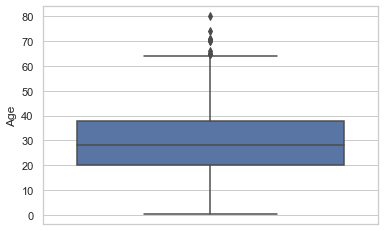

In [10]:
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y=titanic["Age"])

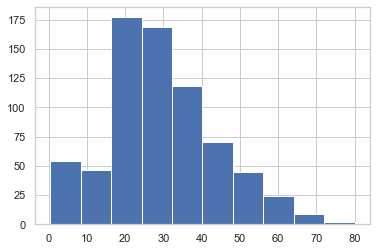

In [11]:
titanic['Age'].hist(bins=10)

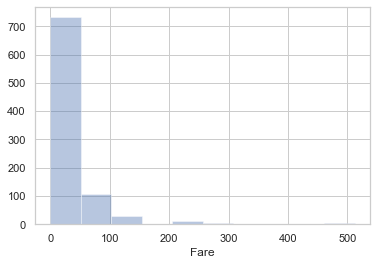

In [12]:
sns.set(style="whitegrid")
sns.distplot(titanic["Fare"], bins=10, kde=False, rug=False)
plt.show()

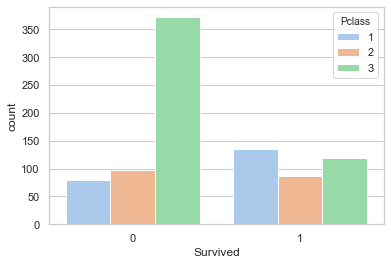

In [13]:
sns.countplot(x="Survived", hue="Pclass", palette="pastel", data=titanic)
plt.show()
# this shows Pclass3 many dint survive

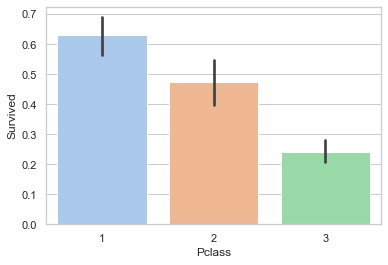

In [14]:
sns.barplot(y="Survived", x="Pclass", palette="pastel", data=titanic)
plt.show()

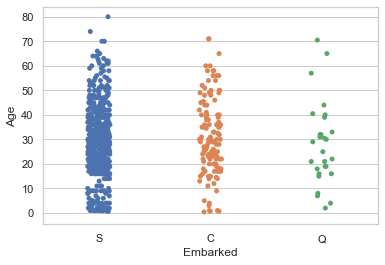

In [15]:
sns.stripplot(x="Embarked", y="Age", data=titanic, jitter=True)
plt.show()
# s = southampton
# q = queenstown
# c = cherbourg

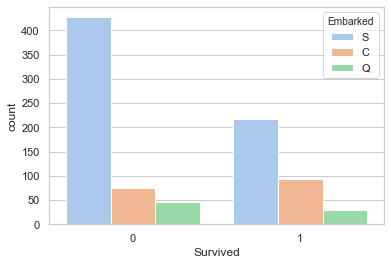

In [16]:
sns.countplot(x="Survived", hue="Embarked", palette="pastel", data=titanic)
plt.show()

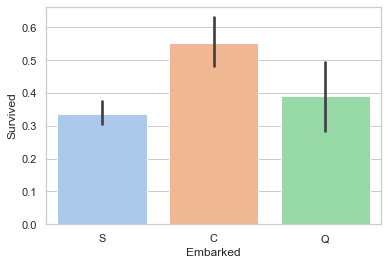

In [17]:
sns.barplot(y="Survived", x="Embarked", palette="pastel", data=titanic)
plt.show()

the black error bars display either confidence intervals or the standard deviation. <br>
the bar plot shows an aggregation of some values. <br>
that is also the reason why no bar shows up when there was only one value.

### Data Preparation

#### Handle missing values

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


For symmetric data distribution, one can use mean value for imputing missing values.

In [19]:
# Age has some missing values which needs to be filled

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
model_mean_age = titanic['Age'].mean()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# For the cabin parameter there are over 600 missing values
# We will replace the Cabin value with No if missing and Yes if there is a cabin number

titanic['Cabin'].fillna('No', inplace=True)
titanic['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C


In [23]:
# 2 missing values in the embarked
# use the mode to replace it

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
model_embarked_mode = titanic['Embarked'].mode()[0]
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C


In [24]:
# Drop the Passenger, ticket and Name

titanic = titanic.drop(["PassengerId","Name","Ticket"], axis=1)
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C


In [25]:
# Encode all the categorical variables
# nonnumfeats = [Sex, Cabin, Embarked]

titanicdf = pd.get_dummies(titanic, columns=nonnumfeats)
titanicdf.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0


In [26]:
titanicdf.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Cabin_No        uint8
Cabin_Yes       uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [27]:
titanicdf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.771044,0.228956,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.420397,0.420397,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
titanicdf.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,0,0,1


In [28]:
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = titanicdf.corr()

In [29]:
corr1 = corr.sort_values(["Survived"], ascending=False)
print(corr1.Survived)

Survived      1.000000
Sex_female    0.543351
Cabin_Yes     0.316912
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.069809
Embarked_S   -0.149683
Cabin_No     -0.316912
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


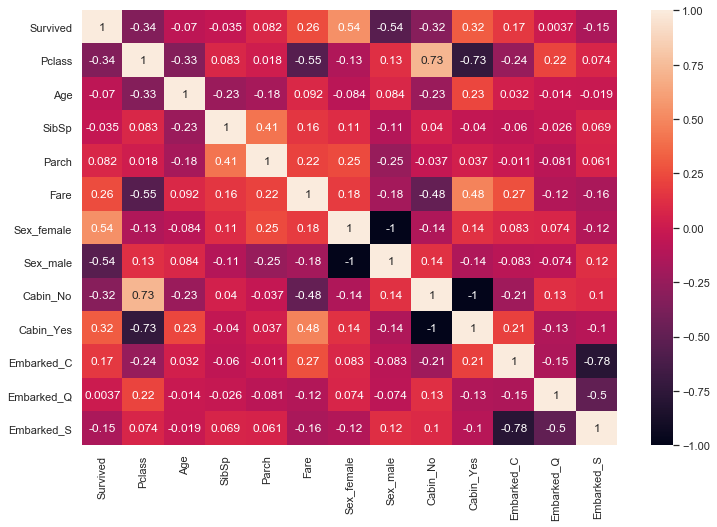

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, annot_kws={"fontsize":12})
plt.show()

sex seems to be one important feature against survival rate. <br>
cabin and Pclass are two important features too. <br>

### 1.Train Model w Logistic Regression

Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative). <br>
Logistic regression is easier to implement, interpret and very efficient to train. 

#### Split Data into Train and Test Sets

In [123]:
from sklearn.model_selection import train_test_split

y = titanicdf["Survived"].values
X = titanicdf.drop(["Survived"],axis=1).values
X1 = titanicdf.drop(["Survived"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Train Model with Algorithm: Logistics Regression 

In [36]:
# Train Model with Logistics Regression
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression()
clr.fit(X_train,y_train)
clr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Score Model and Evaluate Model with:  Logistics Regression

In [37]:
# score model for test set
y_hat= clr.predict(X_test)

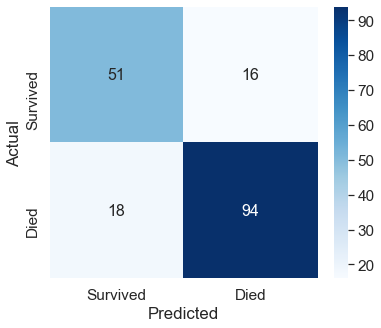

In [38]:
from sklearn.metrics import confusion_matrix

# evaluate model for test set
class_names = ["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [39]:
confusion_matrix(y_test, y_hat)

array([[94, 18],
       [16, 51]], dtype=int64)

In [40]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=81.01%


In [41]:
coeff_df = pd.DataFrame(titanicdf.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(clr.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Sex_female,0.637150
8,Cabin_Yes,0.144899
9,Embarked_C,0.099010
4,Fare,0.059564
10,Embarked_Q,0.050057
3,Parch,-0.094152
11,Embarked_S,-0.118011
7,Cabin_No,-0.144899
2,SibSp,-0.387960
1,Age,-0.450159


### 2. Train with other Models

In [132]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [125]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [128]:
logreg_cv = LogisticRegressionCV(random_state=3)
svc = SVC(random_state=3)
rfc = RandomForestClassifier(n_estimators=100, random_state=3)
knc = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=3)
gbc = GradientBoostingClassifier(random_state=3)

In [129]:
models = [logreg_cv, svc, rfc, knc, gnb, dtc, gbc]

In [136]:
for model in models:
    model.fit(X_train, y_train)
#     y_hat = model.predict(X_test)
    score = cross_val_score(model, X, y, scoring = "accuracy", cv = kfold, n_jobs=4)
#     score = accuracy_score(y_test, y_hat)
    print("Score for {} model: {}".format(str(model).rsplit('(',1)[0], score.mean()))

Score for LogisticRegressionCV model: 0.793458177278402
Score for SVC model: 0.6813233458177278
Score for RandomForestClassifier model: 0.8103870162297128
Score for KNeighborsClassifier model: 0.7251061173533083
Score for GaussianNB model: 0.775518102372035
Score for DecisionTreeClassifier model: 0.7800998751560548
Score for GradientBoostingClassifier model: 0.8271660424469414


### 3. Hyperparameters Tuning

top 3 score: <br>
GradientBoostingClassifier model <br>
LogisticRegressionCV model <br>
RandomForestClassifer model


logisticregression just trains logistic regression on provided data. <br>
logisticregressionCV divides the Train dataset into different Train/Validation Set combinations before training and helps test the model is good across different splits of data. process is called K-Fold Cross Validation

to determine which is a better model fit, <br>
check accuracy <br>
check F1 score <br>
check auc-roc score <br>

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#### GBC parameters tuning

In [137]:
param_grid = {
    'loss' : ["deviance"],
    'n_estimators' : [100,200,300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 8],
    'min_samples_leaf': [100,150],
    'max_features': [0.3, 0.1] 
}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(gbc,
                           param_grid,
                           cv=kfold, 
                           scoring="accuracy", 
                           n_jobs= 4, 
                           verbose = 1)

# y = titanicdf["Survived"].values
# X = titanicdf.drop(["Survived"],axis=1).values
grid_search.fit(X, y)
model = grid_search
parameters = grid_search.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   16.3s finished


In [138]:
print(grid_search.best_score_)
print(parameters)

0.8148689138576779
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}


In [276]:
gbc_best = GradientBoostingClassifier(learning_rate=0.1, 
                                      loss='deviance', 
                                      max_depth=8, 
                                      max_features=0.3, 
                                      min_samples_leaf=100,
                                      n_estimators=300)

In [277]:
gbc_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [278]:
y_hat = gbc_best.predict(X_test)
score = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print('Accuracy score for GradientBoostingClassifier tuned parameters: {:.3f}'.format(score))
print('F1 score for GradientBoostingClassifier tuned parameters: {:.3f}'.format(f1score))
print('AUX-ROC score for GradientBoostingClassifier tuned parameters: {:.3f}'.format(rocscore))

Accuracy score for GradientBoostingClassifier tuned parameters: 0.765
F1 score for GradientBoostingClassifier tuned parameters: 0.677
AUX-ROC score for GradientBoostingClassifier tuned parameters: 0.744


look at accuracy difference between train and test set for each fold result. <br>
if model gives high training accuracy but low test accuracy, model is overfitting. <br>
if model does not give good training accuracy, model is underfitting.

In [284]:
scores_train = cross_val_score(gbc_best, X_train, y_train, cv=5)
scores_test = cross_val_score(gbc_best, X_test, y_test, cv=5)
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores_train.mean(), scores_train.std() * 2))
print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

Train Accuracy: 0.81 (+/- 0.05)
Test Accuracy: 0.63 (+/- 0.03)


GBC model seems like overfitting

#### Random Forest Classifier parameters tuning

In [142]:
param_grid = {
    'max_depth': [4,6,8],
    'n_estimators': [100,50,10],
    'max_features': ['sqrt','auto','log2'],
    'min_samples_split': [2,3,10],
    'min_samples_leaf': [1,3,10],
    'bootstrap': [True,False],
}

rfc = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search_rfc = GridSearchCV(rfc,
                           scoring='accuracy',
                           param_grid=param_grid,
                           cv=cross_validation,
                           verbose=1)

grid_search_rfc.fit(X, y)
parameters = grid_search_rfc.best_params_

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:  2.5min finished


In [143]:
print(grid_search_rfc.best_score_)
print(parameters)

0.8316866486723997
{'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [285]:
rfc_best = RandomForestClassifier(bootstrap=False,
                                  max_depth=8,
                                  max_features='log2',
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=10)

In [289]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [290]:
y_hat = rfc_best.predict(X_test)
score = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print('Accuracy score for Random Forest Classifier tuned parameters: {:.3f}'.format(score))
print('F1 score for Random Forest Classifier tuned parameters: {:.3f}'.format(f1score))
print('AUX-ROC score for Random Forest Classifier tuned parameters: {:.3f}'.format(rocscore))

Accuracy score for Random Forest Classifier tuned parameters: 0.793
F1 score for Random Forest Classifier tuned parameters: 0.709
AUX-ROC score for Random Forest Classifier tuned parameters: 0.769


In [292]:
scores_train = cross_val_score(rfc_best, X_train, y_train, cv=5)
scores_test = cross_val_score(rfc_best, X_test, y_test, cv=5)
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores_train.mean(), scores_train.std() * 2))
print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

Train Accuracy: 0.81 (+/- 0.06)
Test Accuracy: 0.75 (+/- 0.09)


Random Forest Classifier model less overfitting

### 4. Features Importance

there is attribute coef_ for SVC but it only works for SVM with linear kernel. <br>
for other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space

for Random Forest Classifer

Text(0.5, 0, 'Relative Importance')

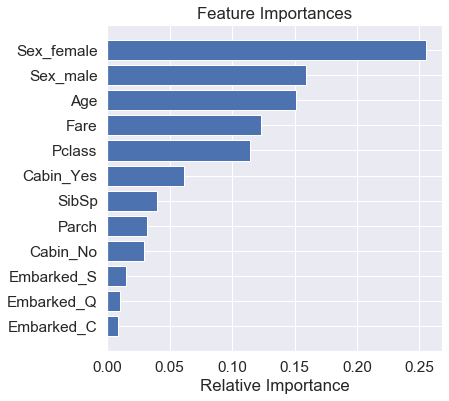

In [255]:
importances = rfc_best.feature_importances_
indices = np.argsort(importances)
features = X1.columns
plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

for Gradient Booster Classifier

Text(0.5, 0, 'Relative Importance')

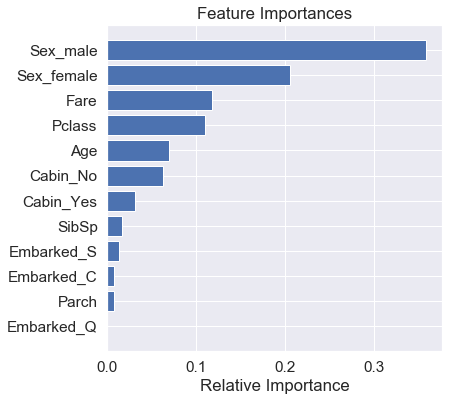

In [256]:
importances = gbc_best.feature_importances_
indices = np.argsort(importances)
features = X1.columns
plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### 5. Ensemble Modelling (Stacking or Voting)

In [79]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

StackingClassifier

In [257]:
estimators = [
    ('rfc', rfc_best),
    ('gbc', gbc_best),
]

In [258]:
stack_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegressionCV(), n_jobs=4
)

In [259]:
stack_clf.fit(X_train, y_train)
y_hat = stack_clf.predict(X_test)
score = accuracy_score(y_test, y_hat)
score

0.7821229050279329

VotingClassifier

In [260]:
vot_clf = VotingClassifier(estimators=[
    ('rfc', rfc_best), 
    ('gbc', gbc_best),
    ('log', logreg_cv)], voting='soft', n_jobs=4)

vot_clf.fit(X_train, y_train)
y_hat = vot_clf.predict(X_test)
score = accuracy_score(y_test, y_hat)
score

0.7541899441340782

will use stack_clf

### Submitting to Kaggle

#### Stupid Baseline (Everyone Dies)

The stupid baseline is based on the majority of *Survived* status. In which case, we will have a rule which states that everybody died in the Titanic. 

In [80]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = 0
dfout[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [81]:
dfout.to_csv("stupidbaseline.csv",index=False)

#### Data Preparation for the test.csv

In [261]:
titanictest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [262]:
titanictestdf = titanictest.drop(["PassengerId","Name","Ticket"],axis=1)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S


In [263]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [264]:
# fill in the missing age
titanictestdf['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [265]:
# fill in the missing cabins
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanictestdf['Cabin'].fillna('No', inplace=True)
titanictestdf['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,No,Q
1,3,female,47.0,1,0,7.0000,No,S


In [266]:
# fill in the missing fare with the mean fare
titanictestdf['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [267]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [268]:
# Encode all the categorical variables
predictdf = pd.get_dummies(titanictestdf,columns=nonnumfeats)
predictdf.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,1,0,0,0,1


In [269]:
X = predictdf.values

In [270]:
Xp = scaler.fit_transform(X)

#### Prediction with Stacked Trained Model

In [271]:
yp_hat = stack_clf.predict(Xp)

In [272]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:5]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [273]:
dfout.to_csv("stack_clf_predict.csv",index=False)

### Errors / Improvements

* overfitting of chosen models
* categorizing of continuous variables, like age, into groups (age 0-16, etc) could result in better modelling
* removing useless features in feature engineering could result in better modelling

### Conclusions

The purpose of Titanic dataset is to use the existing features of passengers onboard Titanic as predictors to predict their survival outcome, for 0 being dead and 1 being survived from the tragic ship crash. The logistic regression is first performed , and then finding other models, finally settling on a combined model via stacking.

However, from either the random forest classifier or gradient boost classifier model, we can easily see that the Titanic survival outcome is highly depended on several predictors, such as sex, fare, class and age. <br>
In particular, female are more likely to survived than male while keeping other predictors conditions constant and older people are less likely to survived while keeping other predictors conditions constant.